In [175]:
import pandas as pd
import numpy as np
import re

In [176]:
file = open("reddit_depression.txt", 'r', encoding = "utf8") #open for reading with utf8 encoding
f = file.readlines() #read line by line

In [177]:
f = [s for s in f if s!= '\n'] #drop all /n sentenes

#drop pattern '%% number\n'
pattern_to_delete_1 = re.compile(r'%% \d{1,}\n')

for row in range(len(f)):
    f[row] = re.sub(pattern_to_delete, '', f[row])
    f[row] = f[row].replace('\n','')

f = [s for s in f if s!= ''] #drop empty sentences that left after deleting unnecessary

In [272]:
len(f)

5522040

In [273]:
temp_list = f

In [276]:
joint_texts_list = []
temp_join_list = []

for i in range(len(temp_list)):
    if ('%% ' not in temp_list[i]): # find sentences without %% signs
        temp_join_list.append(temp_list[i]) #adding them to temp list
    else:
        if (len(temp_join_list) != 0): #check in order not to add empty sentences
            joint_texts_list.append(' '.join(temp_join_list)) #join appended sentences
            temp_join_list = [] #emptying temp list
        joint_texts_list.append(temp_list[i]) #appending texts with %%

In [289]:
reddit_id_list = []
title_list = []
fake_id_list = []
nickname_list = []
text_list = []

for i in range(len(joint_texts_list)):
    if(i+1 != len(joint_texts_list)):
        if (joint_texts_list[i] == joint_texts_list[i+1] and joint_texts_list[i] == joint_texts_list[i+2]):
            reddit_id_list.append(joint_texts_list[i])
            title_list.append(joint_texts_list[i+3])
            nickname_list.append(joint_texts_list[i+4])
            text_list.append(joint_texts_list[i+5])

In [409]:
df = pd.DataFrame (columns = ['Reddit ID', 'Fake ID', 'Title', 'Nickname' ,'Text'])
df['Reddit ID'] = reddit_id_list
df['Fake ID'] = range(len(reddit_id_list))
df['Title'] = title_list
df['Nickname'] = nickname_list
df['Text'] = text_list

#df.head()

## Distribution of the text length

In [410]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

%matplotlib inline

### by number of characters

In [411]:
df.dropna(inplace = True)

In [412]:
df['Text_len'] = [len(s) for s in df['Text']]

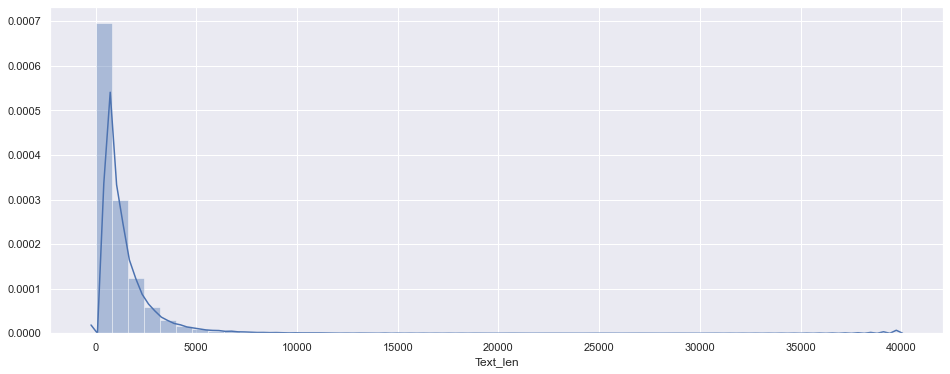

In [413]:
sns.set(); np.random.seed(0)
plt.figure(figsize=(16, 6))

ax = sns.distplot(df['Text_len'])

In [414]:
df['Text_len'].sort_values().value_counts()

10       5650
9        1270
292       164
262       162
158       155
         ... 
12528       1
13366       1
10141       1
16286       1
5733        1
Name: Text_len, Length: 7547, dtype: int64

In [415]:
df['Text_len'].describe()

count    172141.00000
mean       1101.55185
std        1410.92854
min           1.00000
25%         305.00000
50%         686.00000
75%        1381.00000
max       39845.00000
Name: Text_len, dtype: float64

In [416]:
df = df[(df['Text_len'] <= 3000) & (df['Text_len']  >= 200)]

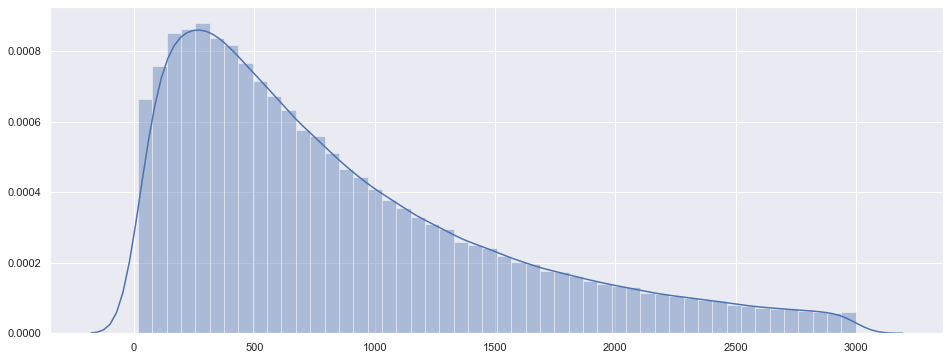

In [417]:
plt.figure(figsize=(16, 6))
ax = sns.distplot(ch_texts_len_2)

In [418]:
df['Text_len'].describe()

count    131284.000000
mean        980.939002
std         663.569901
min         200.000000
25%         454.000000
50%         786.000000
75%        1343.000000
max        3000.000000
Name: Text_len, dtype: float64

In [407]:
list_1 = df['Text'][(df['Text_len'] == 150)].to_list()

In [419]:
list_1[:5]

['She loves my brother and sister, but I feel she hates me. She’s always complaining that I’m miserable and that I sit in my room all day, and that I’m just like my dad. My grades are slipping and she knows about it and I feel like I’m not enough for her. I really don’t know what to do to please her. ',
 "I'm with not a perfect man by any means but a healthy man, he's cute too. But I have intrusive thoughts and I fixate, obsess, dissect and over react. I am a highly depressed person and I'm ready to talk it out with a professional because I want to be a healthy adult so I can start my life with him. ",
 'I feel like something switched in the past few weeks. I would normally be excited to see my friends/family, but lately, the thought of seeing anyone just fills me with dread and anxiety. This is one of the first holidays that I am reluctantly going home, wishing that I could spend it in bed instead.',
 "Feeling super depressed and I'm at the point of bursting. My finals are this week, 

Desicion:
1. Texts below 10 charaters were dropped from the list as they did not contain any useful infromation
1. Texts below 150 characters do not contain sufficient information to make decision about certain distortion
2. Texts over 1500 (over 75% percentile) contains large amount of information. However, multiple distortions can be found in the text, and which require annotation sentece by setence which can be studied in further work.

**Question:** should we provide examples of the texts?

Taking into account statments mentioned above, it was decided to limit texts sizes between 200 to 1500 characters.

Positively skewed (https://www.statisticshowto.com/probability-and-statistics/skewed-distribution/)

https://seaborn.pydata.org/tutorial/distributions.html
https://seaborn.pydata.org/generated/seaborn.kdeplot.html
https://python-graph-gallery.com/70-basic-density-plot-with-seaborn/

In [420]:
df.to_csv("final_orig.csv", sep='\t', index = False)